Data Head:
    BID                                          Bitstream  class
0    0  1000111010111101101100110111001111001000101111...      1
1    1  1101111100101011111111101101010001110110000010...      1
2    2  0011001010001010100100011101000111110100101111...      0
3    3  1101010110000110100001001100111101000000110001...      1
4    4  1010111100001001000101010010111010011101001100...      1

Training and evaluating models...
Logistic Regression: Accuracy = 0.51
Random Forest: Accuracy = 0.47
Support Vector Machine: Accuracy = 0.50
K-Nearest Neighbors: Accuracy = 0.46
Gradient Boosting: Accuracy = 0.52


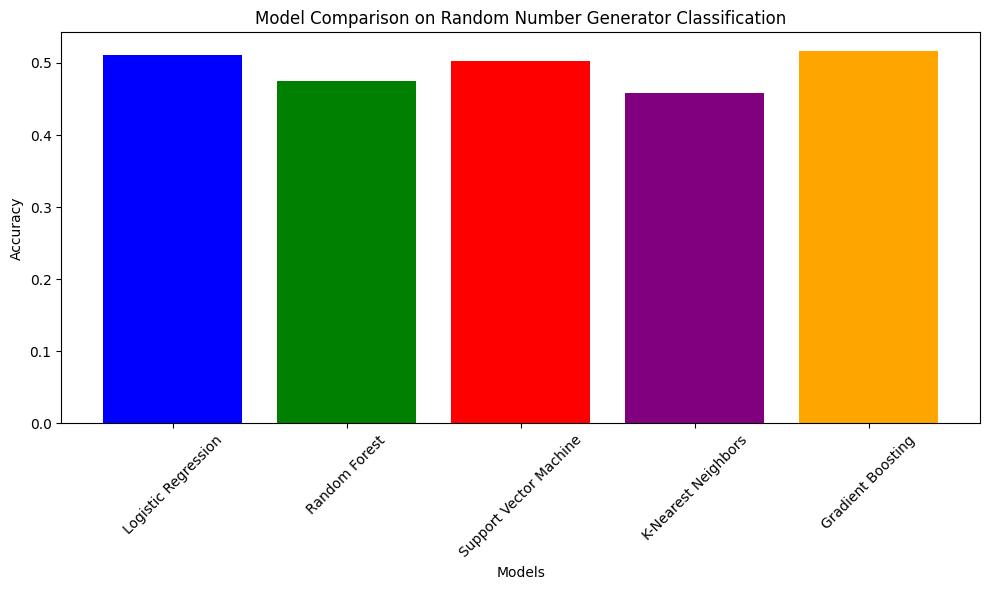


Best Performing Model: Gradient Boosting with Accuracy = 0.52

Confusion Matrix for Gradient Boosting...


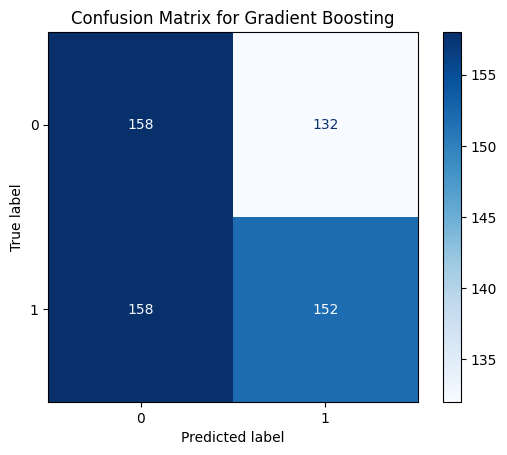

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
data = pd.read_csv(r'C:\Users\SHIRSHA\OneDrive\Desktop\python_projects\TrainingData.csv')
print("Data Head:\n", data.head())

# Assigning features (X) and labels (y)
X = data.iloc[:, 1].apply(lambda x: list(map(int, list(x)))).tolist()  # Convert bitstream to list of bits
X = pd.DataFrame(X)
y = data.iloc[:, 2]  # Labels (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for models like SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Training and evaluating models
results = {}
print("\nTraining and evaluating models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.2f}")

# Visualizing model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Random Number Generator Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Finding the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")

# Confusion Matrix for the best performing model
print(f"\nConfusion Matrix for {best_model_name}...")
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Displaying Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.savefig('confusion_matrix.png')
plt.show()